In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import scipy
import seaborn as sns

plt.rcParams['figure.figsize'] = (12.0, 8.0)

In [2]:
data = pd.read_csv("metadaten_syntactic_complexity.tsv", sep="\t", header=0, index_col=0)

In [3]:
data_for_boxplots = data.copy()
data_for_boxplots["brow_genre"] = data_for_boxplots["brow"]
low_brow = data[data.brow == "low"].copy()
low_brow["brow_genre"] = low_brow["genre"]
data_for_boxplots = pd.concat((data_for_boxplots, low_brow))

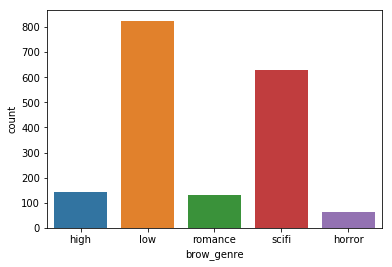

In [4]:
sns.countplot(x="brow_genre", data=data_for_boxplots)
plt.rcParams['figure.figsize'] = (12.0, 8.0)

## Dependency distance

Intuitively, larger values should indicate higher complexity.

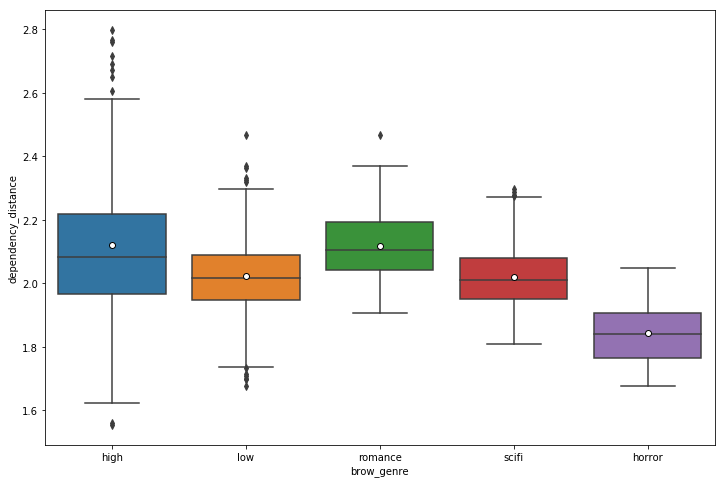

In [5]:
foo = sns.boxplot(x="brow_genre", y="dependency_distance", data=data_for_boxplots, showmeans=True, meanprops={"markerfacecolor": "white", "markeredgecolor": "black", "marker": "o"})

In [6]:
foo.get_subplotspec()

## Closeness centrality

Intuitively, a lower value should indicate higher complexity (since we have longer paths).

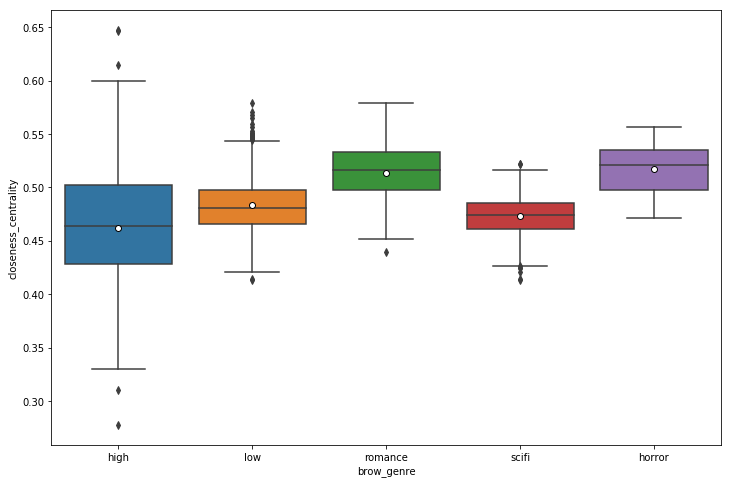

In [7]:
sns.boxplot(x="brow_genre", y="closeness_centrality", data=data_for_boxplots, showmeans=True, meanprops={"markerfacecolor": "white", "markeredgecolor": "black", "marker": "o"})

## Outdegree centralization

Intuitively, lower values should indicate higher complexity.

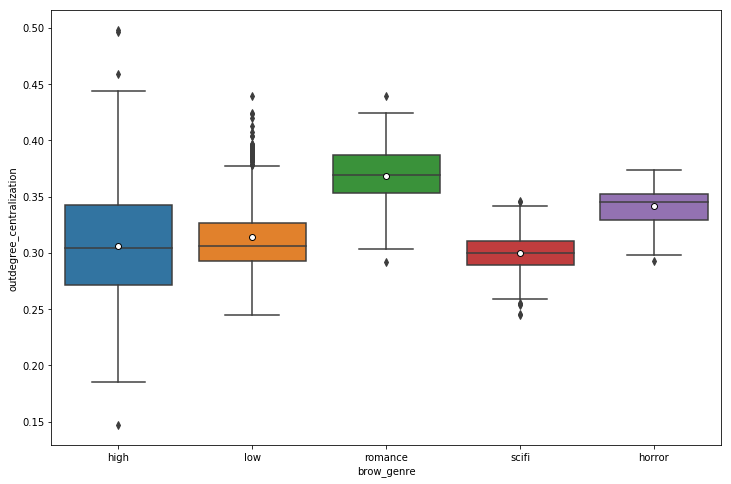

In [8]:
sns.boxplot(x="brow_genre", y="outdegree_centralization", data=data_for_boxplots, showmeans=True, meanprops={"markerfacecolor": "white", "markeredgecolor": "black", "marker": "o"})

## Closeness centralization

Intuitively, lower values should indicate higher complexity.

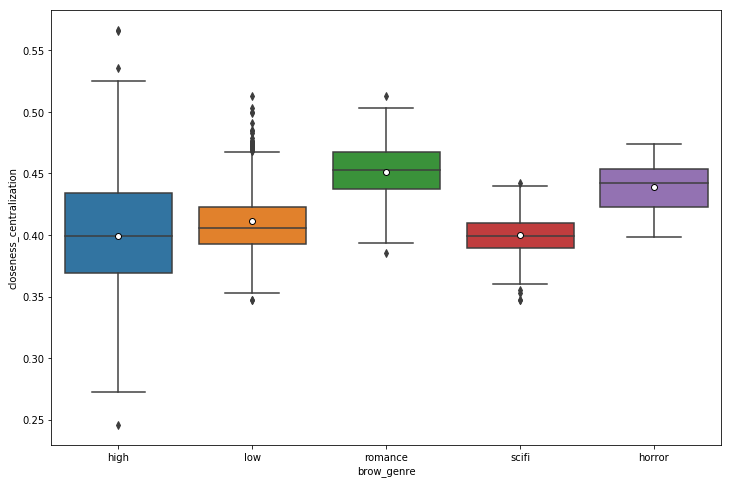

In [9]:
sns.boxplot(x="brow_genre", y="closeness_centralization", data=data_for_boxplots, showmeans=True, meanprops={"markerfacecolor": "white", "markeredgecolor": "black", "marker": "o"})

## Average sentence length

Higher values should indicate higher complexity.

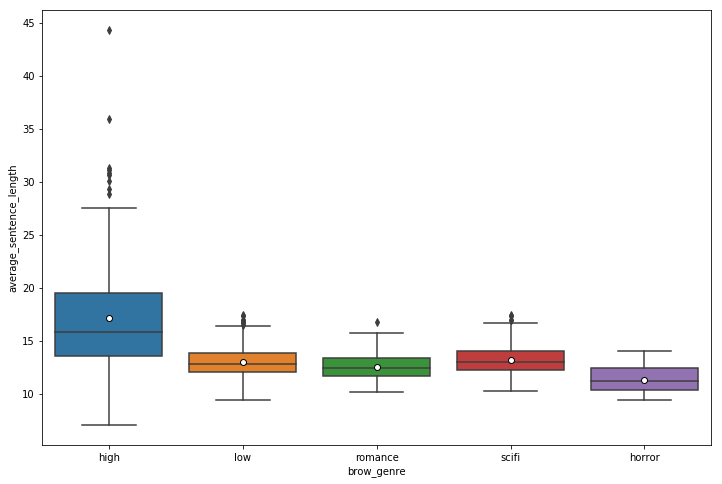

In [10]:
sns.boxplot(x="brow_genre", y="average_sentence_length", data=data_for_boxplots, showmeans=True, meanprops={"markerfacecolor": "white", "markeredgecolor": "black", "marker": "o"})

## Dependents per word

I'm not sure how to interpret these values in terms of syntactic complexity…

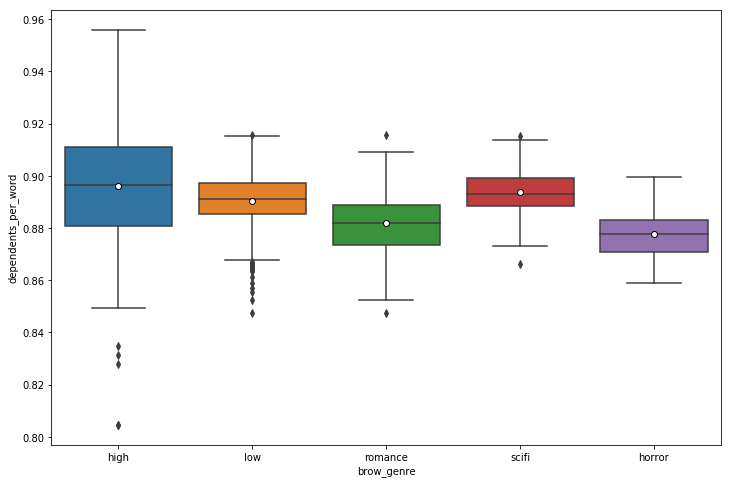

In [11]:
sns.boxplot(x="brow_genre", y="dependents_per_word", data=data_for_boxplots, showmeans=True, meanprops={"markerfacecolor": "white", "markeredgecolor": "black", "marker": "o"})

## Longest shortest path

Intuitively, larger values should indicate higher complexity.

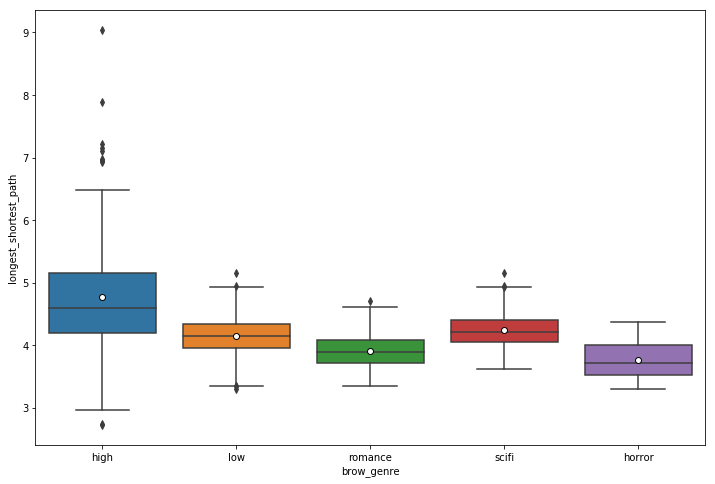

In [12]:
sns.boxplot(x="brow_genre", y="longest_shortest_path", data=data_for_boxplots, showmeans=True, meanprops={"markerfacecolor": "white", "markeredgecolor": "black", "marker": "o"})

## Punctuation per sentence

More punctuation marks should indicate more complex sentences.

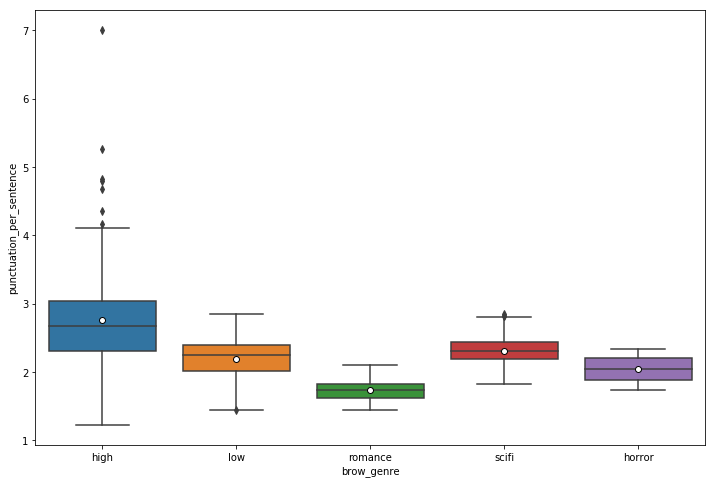

In [13]:
sns.boxplot(x="brow_genre", y="punctuation_per_sentence", data=data_for_boxplots, showmeans=True, meanprops={"markerfacecolor": "white", "markeredgecolor": "black", "marker": "o"})

## Punctuation per token

More punctuation marks per token might indicate either short or complex sentences.

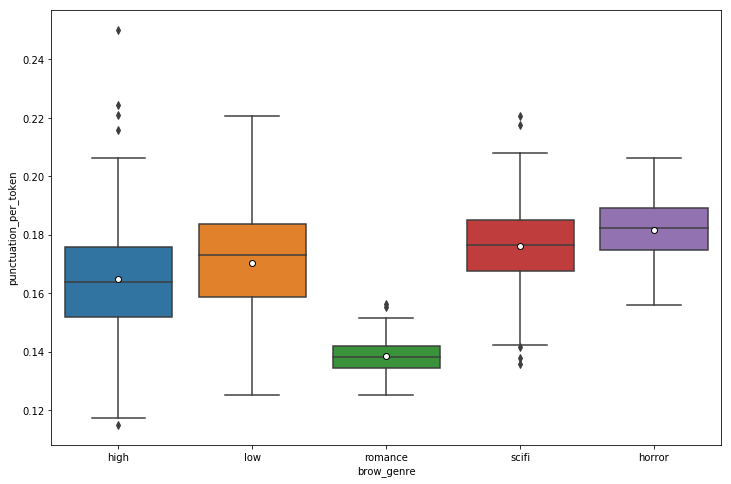

In [14]:
sns.boxplot(x="brow_genre", y="punctuation_per_token", data=data_for_boxplots, showmeans=True, meanprops={"markerfacecolor": "white", "markeredgecolor": "black", "marker": "o"})

## Correlations

In [15]:
data_for_pairplot = data.copy()
data_for_pairplot["fine_labels"] = data_for_pairplot["brow"].where(data["genre"].isna(), data_for_pairplot["genre"])
data_for_pairplot.drop(columns=["ID", "Titel", "Autor", "Sprache", "Publikation", "Erste Publikation", "Geschlecht", "GND", "Verlag", "brow", "genre", "dependency_distance_stdev", "closeness_centrality_stdev", "outdegree_centralization_stdev", "closeness_centralization_stdev", "average_sentence_length_stdev", "dependents_per_word_stdev", "longest_shortest_path_stdev", "punctuation_per_sentence_stdev"], inplace=True)

In [16]:
default_palette = sns.color_palette()
new_palette = [default_palette[0]] + default_palette[2:]
sns.set_palette(new_palette)

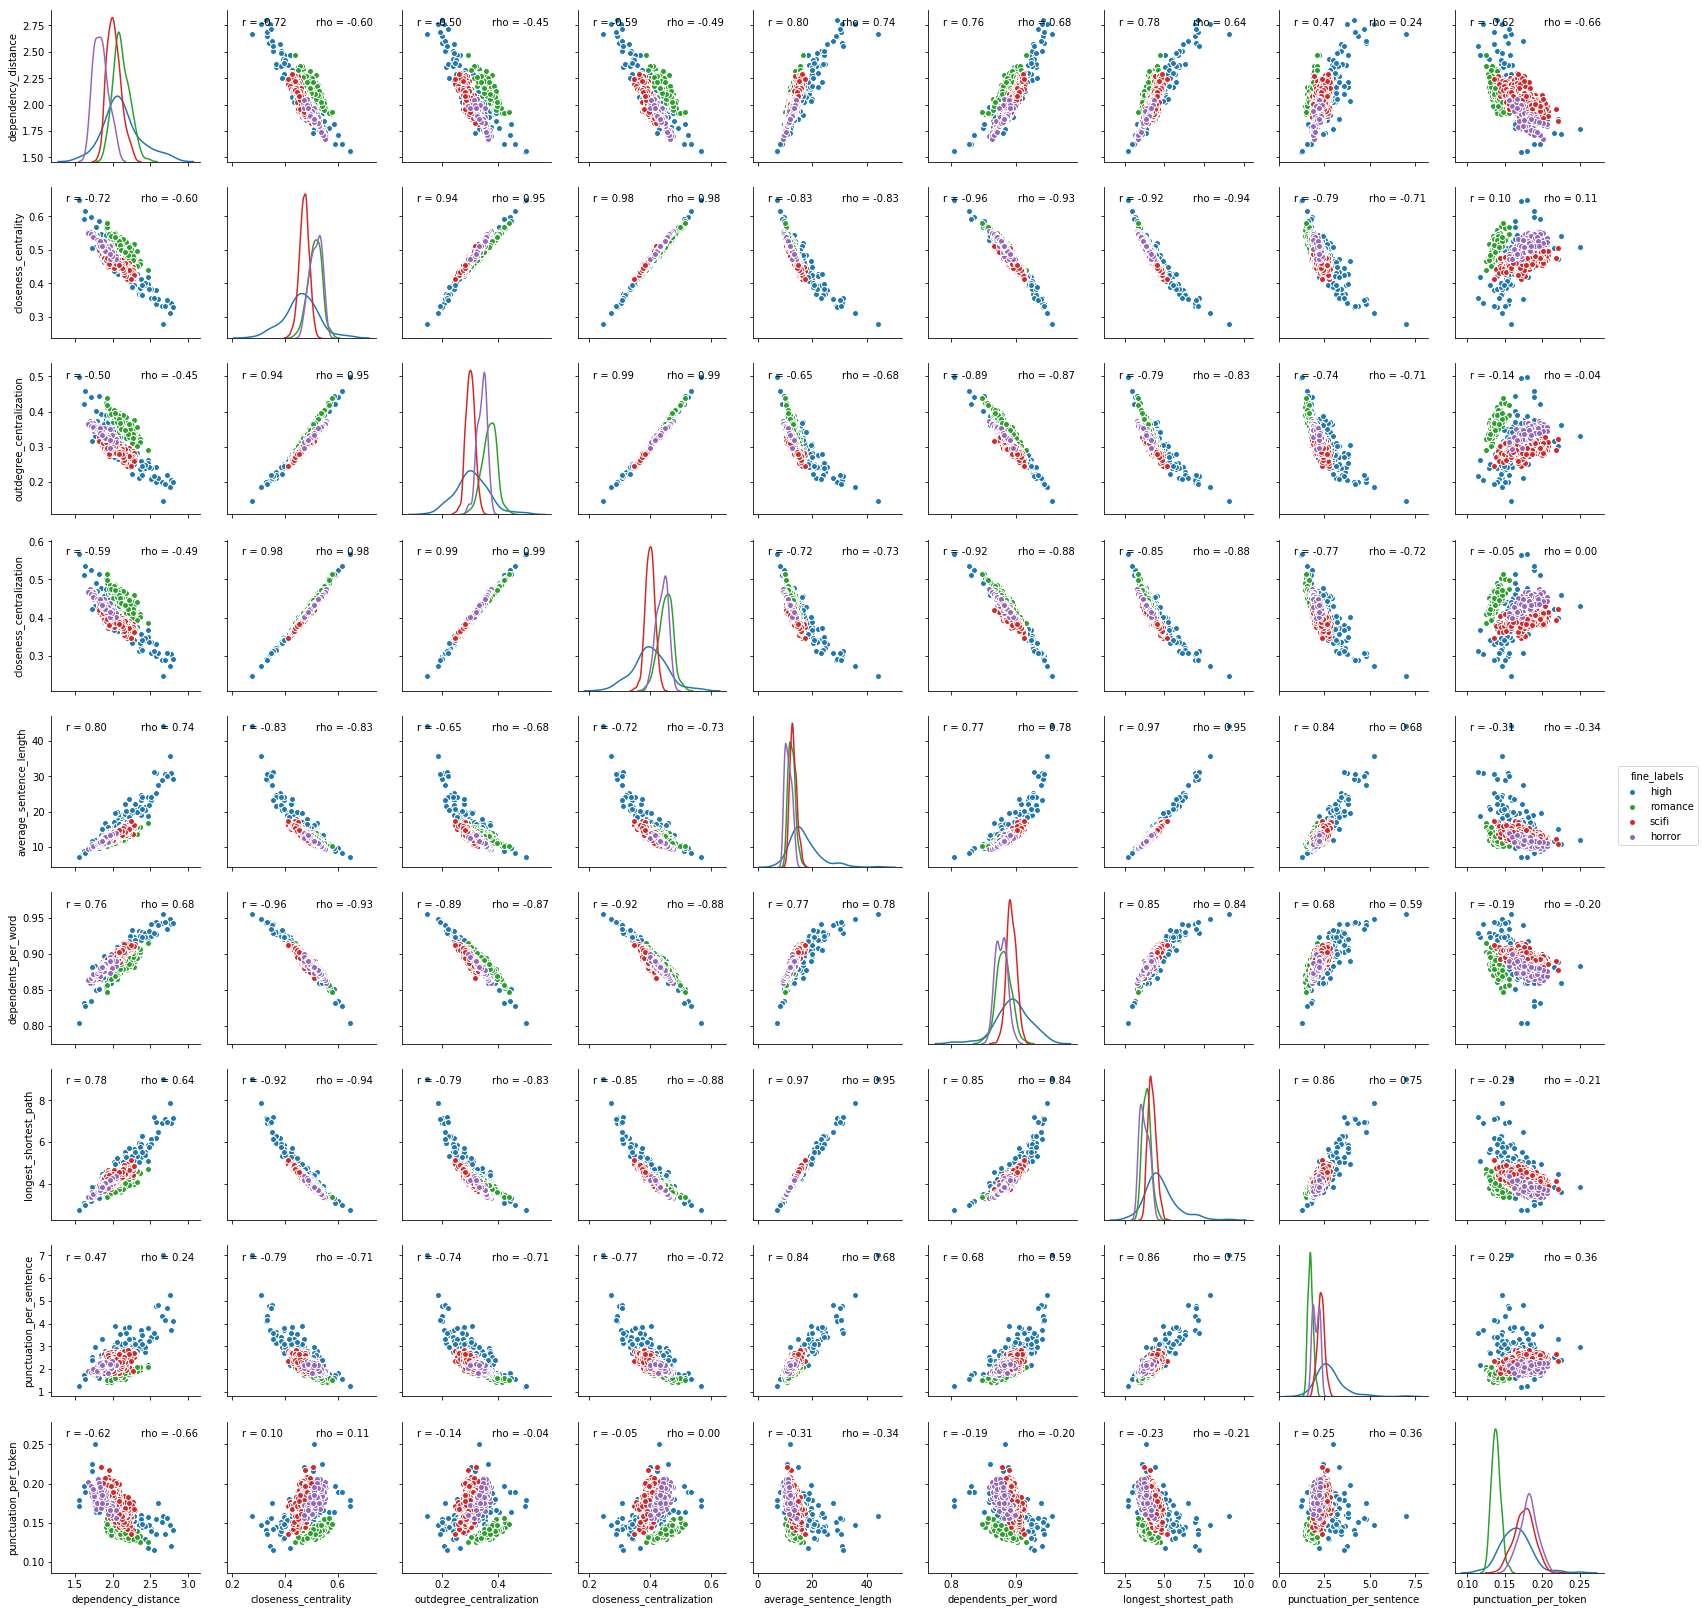

In [17]:
def corrfunc_factory(n_hues):
    n = 0
    xs, ys, current_ax = None, None, None
    def corrfunc(x, y, **kws):
        nonlocal n, xs, ys, current_ax
        n += 1
        ax = plt.gca()
        if n == 1:
            current_ax = ax
        assert ax == current_ax
        xs = pd.concat((xs, x))
        ys = pd.concat((ys, y))
        if n == n_hues:
            r, _ = scipy.stats.pearsonr(xs, ys)
            rho, _ = scipy.stats.spearmanr(xs, ys)
            ax.annotate("r = %.2f" % r, xy=(.1, .9), xycoords=ax.transAxes)
            ax.annotate("rho = %.2f" % rho, xy=(.6, .9), xycoords=ax.transAxes)
            xs, ys = None, None
            n = 0
    return corrfunc


corrfunc = corrfunc_factory(n_hues=4)
g = sns.pairplot(data_for_pairplot, hue="fine_labels", diag_kind="kde")
g.map_offdiag(corrfunc)

In [18]:
data_for_heatmap = data_for_pairplot.copy()
data_for_heatmap["closeness_centrality"] *= -1
data_for_heatmap["outdegree_centralization"] *= -1
data_for_heatmap["closeness_centralization"] *= -1

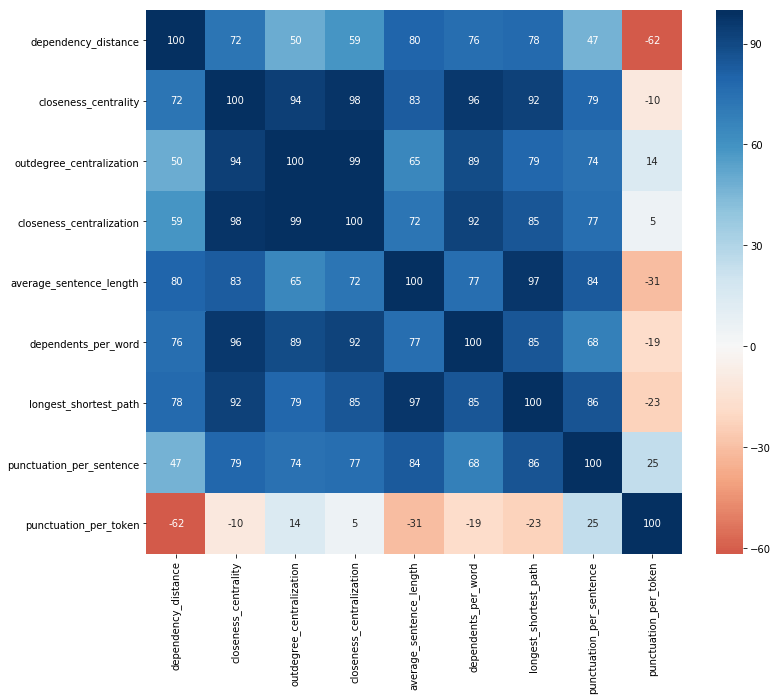

In [19]:
plt.rcParams['figure.figsize'] = (12.0, 10.0)
pearson = data_for_heatmap.corr(method="pearson") * 100
sns.heatmap(pearson, cmap="RdBu", center=0, annot=True, fmt=".0f")

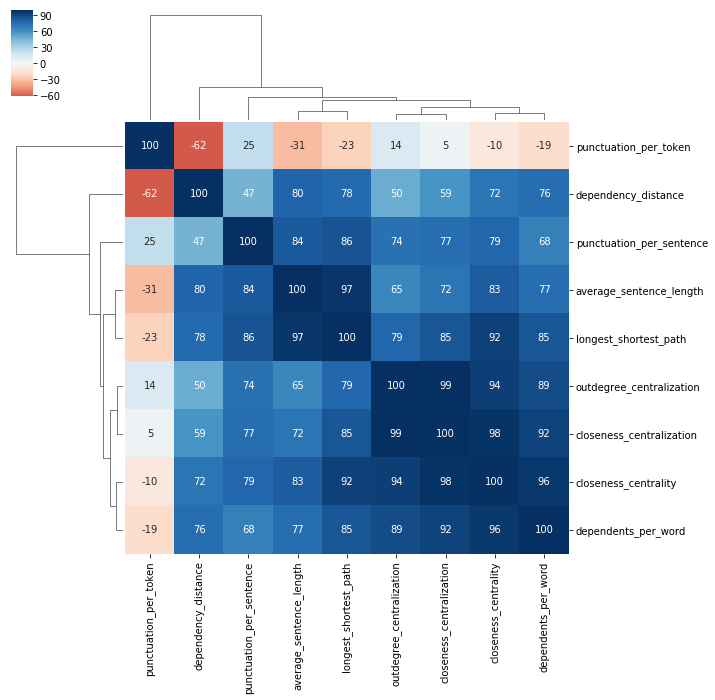

In [20]:
sns.clustermap(pearson, cmap="RdBu", center=0, annot=True, fmt=".0f", method="average")

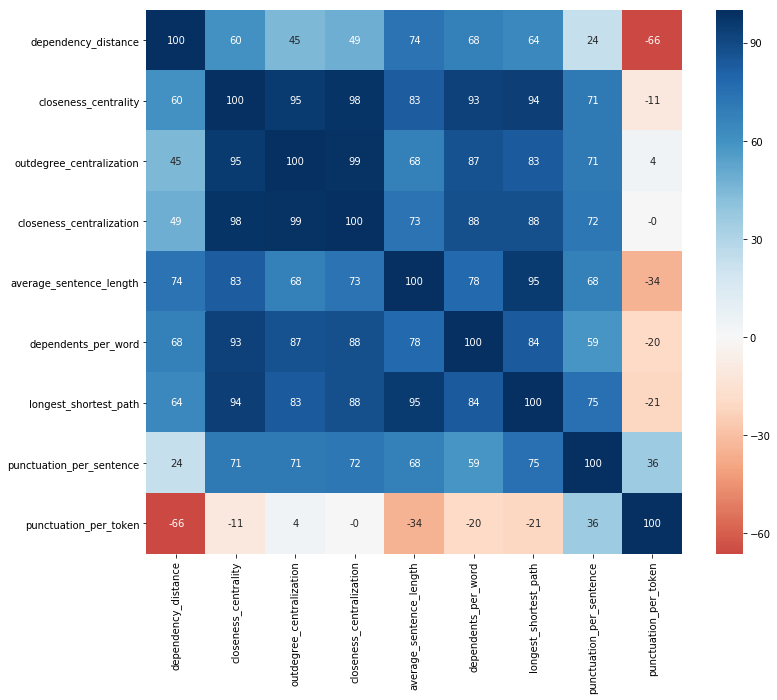

In [21]:
spearman = data_for_heatmap.corr(method="spearman") * 100
sns.heatmap(spearman, cmap="RdBu", center=0, annot=True, fmt=".0f")

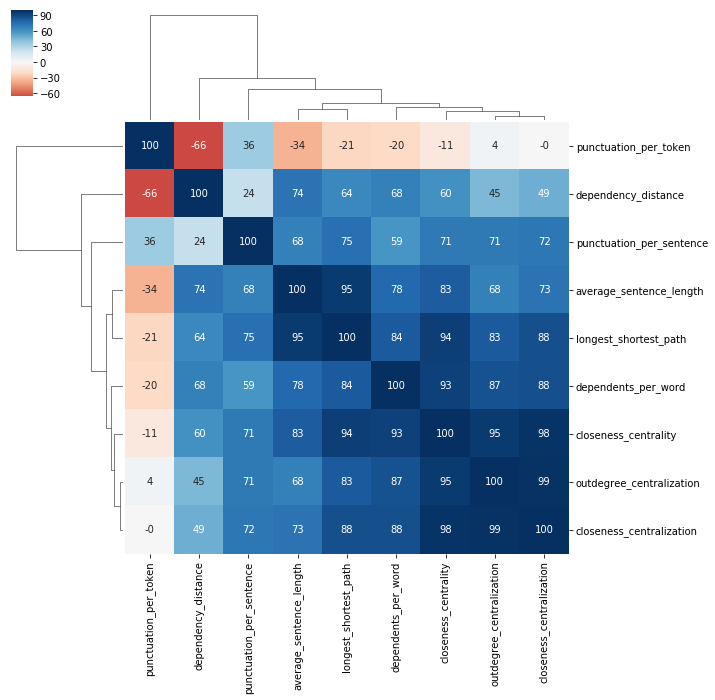

In [22]:
sns.clustermap(spearman, cmap="RdBu", center=0, annot=True, fmt=".0f", method="average")

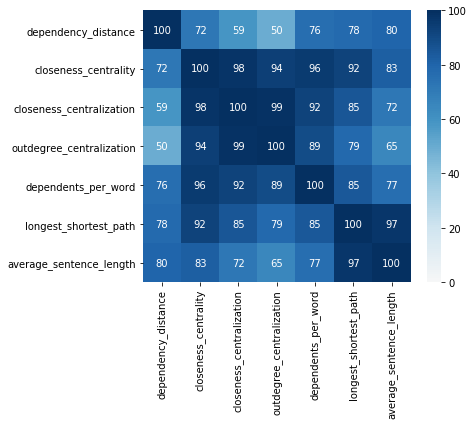

In [23]:
# pearson = data_for_heatmap.corr(method="pearson") * 100
wo_punctuation = data_for_heatmap.copy()
wo_punctuation = wo_punctuation.drop(["punctuation_per_sentence", "punctuation_per_token"], axis=1)
wo_punctuation = wo_punctuation[['dependency_distance', 'closeness_centrality', 'closeness_centralization', 'outdegree_centralization', 'dependents_per_word', 'longest_shortest_path', 'average_sentence_length']]
wop_pearson = wo_punctuation.corr(method="pearson") * 100
plt.rcParams['figure.figsize'] = (6.0, 5.0)
sns.heatmap(wop_pearson, cmap="RdBu", center=0, annot=True, fmt=".0f", vmin=0, vmax=100)